# ORCA 4500 : Foundations of Data Science (Homework 1)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Question 1 : Load RAW_us_deaths.csv and RAW_us_confirmed_cases.csv (they can be found in homework_1 in files on courseworks) into pandas dataframes. Each row in these dataframes contains the timeseries of cumulatives deaths
and cases for a municipality, in addition to some information about the city (lat, long/ region, etc).

In [6]:
df_deaths_1 = pd.read_csv('RAW_us_deaths.csv')
print(df_deaths_1)
df_confirmed_cases_1 = pd.read_csv('RAW_us_confirmed_cases.csv')
print(df_confirmed_cases_1)

     Province_State      Admin2       UID iso2 iso3  code3     FIPS  \
0           Alabama     Autauga  84001001   US  USA    840   1001.0   
1           Alabama     Baldwin  84001003   US  USA    840   1003.0   
2           Alabama     Barbour  84001005   US  USA    840   1005.0   
3           Alabama        Bibb  84001007   US  USA    840   1007.0   
4           Alabama      Blount  84001009   US  USA    840   1009.0   
...             ...         ...       ...  ...  ...    ...      ...   
3335        Wyoming       Teton  84056039   US  USA    840  56039.0   
3336        Wyoming       Uinta  84056041   US  USA    840  56041.0   
3337        Wyoming  Unassigned  84090056   US  USA    840  90056.0   
3338        Wyoming    Washakie  84056043   US  USA    840  56043.0   
3339        Wyoming      Weston  84056045   US  USA    840  56045.0   

     Country_Region        Lat       Long_  ... 1/17/21  1/18/21  1/19/21  \
0                US  32.539527  -86.644082  ...      55       55      

Question 2 : Rename “Province_State” and “Admin2” to state and city respectively. Make these the index.

In [7]:
df_deaths = df_deaths_1.rename(columns={"Province_State": "state", "Admin2": "city"}).set_index(['state','city'])
print(df_deaths)
df_confirmed_cases = df_confirmed_cases_1.rename(columns={"Province_State": "state", "Admin2": "city"}).set_index(['state','city'])
print(df_confirmed_cases)

                         UID iso2 iso3  code3     FIPS Country_Region  \
state   city                                                            
Alabama Autauga     84001001   US  USA    840   1001.0             US   
        Baldwin     84001003   US  USA    840   1003.0             US   
        Barbour     84001005   US  USA    840   1005.0             US   
        Bibb        84001007   US  USA    840   1007.0             US   
        Blount      84001009   US  USA    840   1009.0             US   
...                      ...  ...  ...    ...      ...            ...   
Wyoming Teton       84056039   US  USA    840  56039.0             US   
        Uinta       84056041   US  USA    840  56041.0             US   
        Unassigned  84090056   US  USA    840  90056.0             US   
        Washakie    84056043   US  USA    840  56043.0             US   
        Weston      84056045   US  USA    840  56045.0             US   

                          Lat       Long_         

Question 3 : Create a new pair of dataframes where you drop all of the columns that are not a date in the time series.

In [8]:
df_deaths_dropped = df_deaths.drop(['UID','iso2','iso3','FIPS','Country_Region','Lat','Long_','Combined_Key','code3','Population'],axis=1)
print(df_deaths_dropped)
df_confirmed_cases_dropped = df_confirmed_cases.drop(['UID','iso2','iso3','FIPS','Country_Region','Lat','Long_','Combined_Key','code3'],axis=1)
print(df_confirmed_cases_dropped)

                    1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
state   city                                                               
Alabama Autauga           0        0        0        0        0        0   
        Baldwin           0        0        0        0        0        0   
        Barbour           0        0        0        0        0        0   
        Bibb              0        0        0        0        0        0   
        Blount            0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
Wyoming Teton             0        0        0        0        0        0   
        Uinta             0        0        0        0        0        0   
        Unassigned        0        0        0        0        0        0   
        Washakie          0        0        0        0        0        0   
        Weston            0        0        0        0        0        0   

           

Question 4 : Melt these dataframes into long format (the columns with be state, city, date, and value).

In [9]:
df_deaths_long = df_deaths_dropped.reset_index().melt(id_vars = ['state','city']).rename(columns={"variable": "date"})
print(df_deaths_long)
df_confirmed_cases_long = df_confirmed_cases_dropped.reset_index().melt(id_vars = ['state','city']).rename(columns={"variable": "date"})
print(df_confirmed_cases_long)

           state        city     date  value
0        Alabama     Autauga  1/22/20      0
1        Alabama     Baldwin  1/22/20      0
2        Alabama     Barbour  1/22/20      0
3        Alabama        Bibb  1/22/20      0
4        Alabama      Blount  1/22/20      0
...          ...         ...      ...    ...
1239135  Wyoming       Teton  1/26/21      6
1239136  Wyoming       Uinta  1/26/21     12
1239137  Wyoming  Unassigned  1/26/21      0
1239138  Wyoming    Washakie  1/26/21     25
1239139  Wyoming      Weston  1/26/21      4

[1239140 rows x 4 columns]
           state        city     date  value
0        Alabama     Autauga  1/22/20      0
1        Alabama     Baldwin  1/22/20      0
2        Alabama     Barbour  1/22/20      0
3        Alabama        Bibb  1/22/20      0
4        Alabama      Blount  1/22/20      0
...          ...         ...      ...    ...
1239135  Wyoming       Teton  1/26/21   2993
1239136  Wyoming       Uinta  1/26/21   1925
1239137  Wyoming  Unassigne

Question 5 : Add another column called “type” to each of the long dataframes. Set it equal to “deaths” for the death dataframe, and “cases” for the case dataframe.

In [10]:
df_deaths_long['type'] = 'deaths'
df_confirmed_cases_long['type'] = 'cases'

print(df_deaths_long)
print(df_confirmed_cases_long)

           state        city     date  value    type
0        Alabama     Autauga  1/22/20      0  deaths
1        Alabama     Baldwin  1/22/20      0  deaths
2        Alabama     Barbour  1/22/20      0  deaths
3        Alabama        Bibb  1/22/20      0  deaths
4        Alabama      Blount  1/22/20      0  deaths
...          ...         ...      ...    ...     ...
1239135  Wyoming       Teton  1/26/21      6  deaths
1239136  Wyoming       Uinta  1/26/21     12  deaths
1239137  Wyoming  Unassigned  1/26/21      0  deaths
1239138  Wyoming    Washakie  1/26/21     25  deaths
1239139  Wyoming      Weston  1/26/21      4  deaths

[1239140 rows x 5 columns]
           state        city     date  value   type
0        Alabama     Autauga  1/22/20      0  cases
1        Alabama     Baldwin  1/22/20      0  cases
2        Alabama     Barbour  1/22/20      0  cases
3        Alabama        Bibb  1/22/20      0  cases
4        Alabama      Blount  1/22/20      0  cases
...          ...        

Question 6 : Combine the two long dataframes into a single long dataframe. Use pd.to_datetime to convert the date column from string to datetime objects.

In [11]:
df_deaths_long['date'] = pd.to_datetime(df_deaths_long['date'])
df_confirmed_cases_long['date'] = pd.to_datetime(df_confirmed_cases_long['date'])

print(df_deaths_long)
print(df_confirmed_cases_long)

           state        city       date  value    type
0        Alabama     Autauga 2020-01-22      0  deaths
1        Alabama     Baldwin 2020-01-22      0  deaths
2        Alabama     Barbour 2020-01-22      0  deaths
3        Alabama        Bibb 2020-01-22      0  deaths
4        Alabama      Blount 2020-01-22      0  deaths
...          ...         ...        ...    ...     ...
1239135  Wyoming       Teton 2021-01-26      6  deaths
1239136  Wyoming       Uinta 2021-01-26     12  deaths
1239137  Wyoming  Unassigned 2021-01-26      0  deaths
1239138  Wyoming    Washakie 2021-01-26     25  deaths
1239139  Wyoming      Weston 2021-01-26      4  deaths

[1239140 rows x 5 columns]
           state        city       date  value   type
0        Alabama     Autauga 2020-01-22      0  cases
1        Alabama     Baldwin 2020-01-22      0  cases
2        Alabama     Barbour 2020-01-22      0  cases
3        Alabama        Bibb 2020-01-22      0  cases
4        Alabama      Blount 2020-01-22   

Question 7 : Use a groupby and a pivot to create a dataframe that calculates the cumulative deaths and cases for every state for every day. This means the index columns will be state and date, and the value columns will be cases and deaths.

In [12]:
df_merge_deaths_cases = pd.concat([df_deaths_long,df_confirmed_cases_long])
df_merge_reset = df_merge_deaths_cases.groupby(['state', 'date', 'type']).sum().reset_index().pivot_table(index=['state', 'date'], columns='type', values='value')
print(df_merge_reset)

type                cases  deaths
state   date                     
Alabama 2020-01-22      0       0
        2020-01-23      0       0
        2020-01-24      0       0
        2020-01-25      0       0
        2020-01-26      0       0
...                   ...     ...
Wyoming 2021-01-22  50583     571
        2021-01-23  50583     571
        2021-01-24  50898     571
        2021-01-25  51062     571
        2021-01-26  51152     596

[21518 rows x 2 columns]


Question 8: Since the the data is given as cumulative deaths/cases, we can use the following code to create a dataframe that has deaths/cases that were recorded on a certain day using the following code (suppose the dataframe from part 7 is called piv): piv2 = piv - piv.groupby(’state’).shift(1).fillna(0.0)
Explain, in words, what this is doing.

Ans - This is the code mentioned in the assignment. This basically shifts the entire data by 1 row. and subtracts it from the original data. This is essential for calculating the number of confirmed cases or deaths reported daily.

In [13]:
df_merge_groupby_state_date_change = df_merge_reset - df_merge_reset.groupby('state').shift(1).fillna(0.0)
print(df_merge_groupby_state_date_change)

type                cases  deaths
state   date                     
Alabama 2020-01-22    0.0     0.0
        2020-01-23    0.0     0.0
        2020-01-24    0.0     0.0
        2020-01-25    0.0     0.0
        2020-01-26    0.0     0.0
...                   ...     ...
Wyoming 2021-01-22  159.0    21.0
        2021-01-23    0.0     0.0
        2021-01-24  315.0     0.0
        2021-01-25  164.0     0.0
        2021-01-26   90.0    25.0

[21518 rows x 2 columns]


Question 9 : Using this dataframe created in part 8, find the dates on which each state recorded the most cases and deaths.

In [14]:
df_merge_groupby_state_date_change[df_merge_groupby_state_date_change['deaths']==max(df_merge_groupby_state_date_change['deaths'])].reset_index().date.values

array(['2020-04-07T00:00:00.000000000'], dtype='datetime64[ns]')

Question 10 : RAW_us_deaths.csv contains a field for the population of each state. Use this information, determine for every date, which state had the greatest number of deaths per capita.

In [15]:
df_deaths_raw = pd.read_csv('RAW_us_deaths.csv')
population_statewise = df_deaths_raw.groupby('Province_State').Population.sum()
df_population_statewise = pd.DataFrame(population_statewise)
df_population_statewise = df_population_statewise.replace(0,np.NaN)
df_population_statewise = df_population_statewise.reset_index().rename(columns={"Province_State": "state"})
df_merge_reset_change = df_merge_groupby_state_date_change.reset_index()
df_merge_pop_deaths_cases = pd.merge(df_merge_reset_change,df_population_statewise, on='state')
df_merge_pop_deaths_cases['death_per_capita'] = df_merge_pop_deaths_cases['deaths']/df_merge_pop_deaths_cases['Population']
df_merge_pop_deaths_cases[df_merge_pop_deaths_cases['death_per_capita']==max(df_merge_pop_deaths_cases['death_per_capita'])]

,state,date,cases,deaths,Population,death_per_capita
7373,Iowa,2020-12-11,1059.0,469.0,3155070.0,0.000149


Question 11 : Make a lineplot for the time series of cumulative deaths for Texas, Louisiana,New York, Florida, New Jersey, Connecticut and California

In [17]:
df_selective_state = df_merge_reset.query("state == ['Texas','Louisiana','New York','Florida','Connecticut','California']").dropna().reset_index()


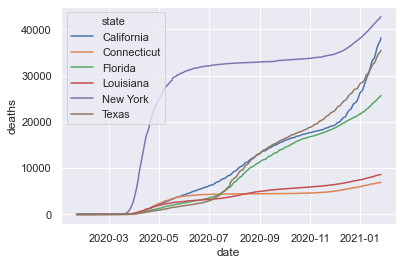

In [18]:
sns.lineplot(data=df_selective_state,x='date',y='deaths',hue='state')

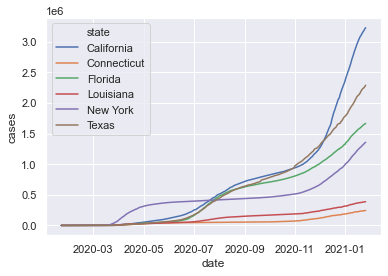

In [19]:
sns.lineplot(data=df_selective_state,x='date',y='cases',hue='state')

Question 12 : Create a stacked bar chart with each of the state’s from Step 12 total cases and total deaths.

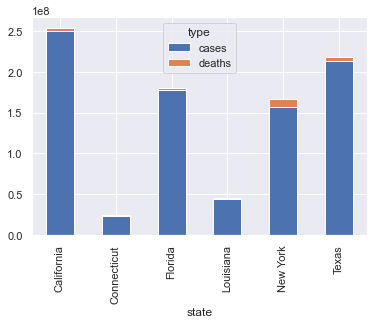

In [20]:
df20 = df_selective_state.groupby('state').sum()
df20.plot(kind='bar', stacked=True)

Question 13 : Write a function that use matplotlib to create a pairplot (histograms on the diagonal, scatterplots on the off-diagonal) for a given dataframe. Use this to make a pairplot for daily deaths in the above states.

In [21]:
df_pair_plot = df_merge_reset_change.groupby(['state','date']).sum()

Step 14 : Function to create a PairPlot

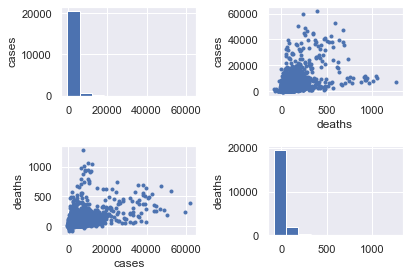

In [24]:
def pair_plot(df):
    df_numeric = df.select_dtypes(['number'])
    n = len(df_numeric.columns)
    arr = np.array([p for p in range(1,n**2+1)]).reshape((n,n))
    for i in range(n):
        for j in range(n):
            if i == j:
                plt.subplot(n,n,arr[i][j])
                plt.tight_layout()
                plt.hist(df_numeric[df_numeric.columns[i]])
                plt.ylabel(df_numeric.columns[i])
            else :
                plt.subplot(n,n,arr[i][j])
                plt.tight_layout()
                plt.scatter(df_numeric[df_numeric.columns[i-1]],df_numeric[df_numeric.columns[j-1]],marker='.')
                plt.xlabel(df_numeric.columns[i-1])
                plt.ylabel(df_numeric.columns[j-1])
    return None 

pair_plot(df_pair_plot)
        